In [158]:
import pandas as pd
import numpy as np

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
pwd

'/Users/vaishnaviadapa/Downloads'

In [161]:
cd Downloads

[Errno 2] No such file or directory: 'Downloads'
/Users/vaishnaviadapa/Downloads


In [162]:
df = pd.read_csv("sample_submission-2.csv")

In [163]:
df.shape
#df.isnull().sum().sort_values(ascending= False) # So no missing values 

(3500, 37)

In [164]:
X = df.drop(['target'],axis = 1).copy()

In [165]:
X.head()

,id,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,NH4_2,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,0.200,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,1.027,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,0.270,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,0.435,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [166]:
df[['O2_1','O2_2','O2_3','O2_4','O2_5','target']].describe()

,O2_1,O2_2,O2_3,O2_4,O2_5,target
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,8.216993,9.291581,9.633064,8.065733,5.671581,8.473834
std,3.040743,6.817822,1.439039,1.463881,2.721399,1.885712
min,0.000000,0.000000,4.900000,2.300000,0.200000,1.300000
25%,7.100000,7.300000,8.770000,6.830000,4.550000,7.470000
50%,7.890000,8.300000,9.500000,7.980000,5.800000,8.280000
75%,9.100000,8.700000,9.545000,9.265000,7.015000,9.110000
max,46.950000,65.950000,16.900000,21.800000,59.400000,65.930000


/var/folders/nq/gs2r3wq12jl31yczqvts28500000gn/T/ipykernel_34432/3578396514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'])


<Axes: xlabel='target', ylabel='Density'>

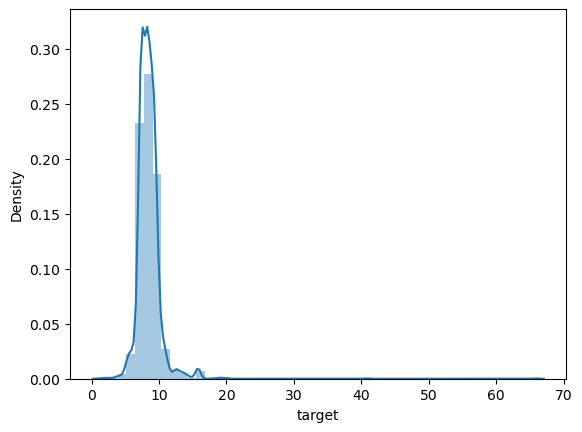

In [167]:
sns.distplot(df['target'])

In [168]:
df_new = df[df['target']<80].copy()

In [169]:
df_new['O2_1'].describe([.1, .99])

count    3500.000000
mean        8.216993
std         3.040743
min         0.000000
10%         6.095000
50%         7.890000
99%        14.901000
max        46.950000
Name: O2_1, dtype: float64

In [170]:
df_new

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [171]:
df_new[['O2_7','NH4_7','NO2_7','NO3_7','BOD5_7','target','O2_6','O2_5']]

,O2_7,NH4_7,NO2_7,NO3_7,BOD5_7,target,O2_6,O2_5
0,7.150,0.429,0.567,1.800,10.37,8.59,8.430,8.110
1,7.150,0.440,0.190,7.695,2.23,9.10,10.070,6.015
2,7.150,0.440,0.567,3.960,3.17,8.21,10.070,4.550
3,6.670,1.380,0.064,1.730,7.37,8.39,8.670,5.200
4,7.150,0.440,0.190,0.760,3.90,8.07,10.070,3.290
...,...,...,...,...,...,...,...,...
3495,6.335,0.440,0.037,1.640,2.50,8.08,8.555,5.690
3496,7.150,1.570,0.090,1.800,2.90,8.09,8.430,0.636
3497,7.200,0.844,0.056,1.800,4.20,9.95,10.400,5.800
3498,2.310,0.429,0.190,7.695,5.00,9.52,8.980,3.290


In [172]:
df_new.to_csv("submission_csv_vaish.csv")

In [173]:
df_new

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,9.545,9.265,8.110,8.430,7.150,0.180,...,4.950,1.730,1.800,4.800,3.150,10.665,10.465,16.645,5.750,10.37
1,1,9.10,13.533,40.900,8.770,9.265,6.015,10.070,7.150,1.107,...,20.050,9.530,7.695,4.550,6.950,2.040,5.200,5.725,2.950,2.23
2,2,8.21,3.710,5.420,8.770,9.265,4.550,10.070,7.150,0.020,...,4.580,3.025,3.960,4.935,4.950,4.725,6.075,6.750,3.500,3.17
3,3,8.39,8.700,8.100,9.500,9.200,5.200,8.670,6.670,0.280,...,8.450,2.070,1.730,6.300,4.700,3.500,6.200,8.670,2.900,7.37
4,4,8.07,8.050,8.650,7.960,9.265,3.290,10.070,7.150,0.360,...,2.020,1.730,0.760,4.800,4.970,3.950,2.800,8.400,3.500,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,8.08,6.250,8.300,7.795,9.265,5.690,8.555,6.335,0.565,...,14.575,0.636,1.640,4.235,4.100,2.800,3.950,7.695,3.540,2.50
3496,3496,8.09,6.630,6.630,8.370,7.600,0.636,8.430,7.150,1.300,...,4.580,1.730,1.800,4.900,3.150,2.040,6.075,8.415,2.155,2.90
3497,3497,9.95,8.367,8.433,8.770,6.170,5.800,10.400,7.200,0.430,...,20.050,1.440,1.800,4.867,4.833,4.725,4.950,8.400,6.625,4.20
3498,3498,9.52,10.000,6.630,9.545,9.265,3.290,8.980,2.310,0.300,...,20.050,9.530,7.695,10.700,5.400,4.725,3.300,6.750,6.625,5.00


In [174]:
from sklearn.ensemble import RandomForestRegressor

In [175]:
X = df.drop(['target','id'],axis = 1).copy() # train is your submission!
X.shape

(3500, 35)

In [176]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

In [177]:
y = df['target']
y.shape

(3500,)

In [178]:
rf.fit(X, y)
#y_hat = rf.predict(test) # test set is hidden from you

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [179]:
feature_imp = rf.feature_importances_
X_cols = X.columns

In [180]:
len(X_cols)

35

In [181]:
len(feature_imp)

35

In [182]:
feature_imp

array([0.51028592, 0.28759707, 0.00267252, 0.00694525, 0.00525631,
       0.00357132, 0.00382579, 0.00493256, 0.00404415, 0.00330535,
       0.00320024, 0.00416159, 0.009369  , 0.00166819, 0.003212  ,
       0.01033696, 0.00255703, 0.00232133, 0.00324203, 0.00543657,
       0.00345583, 0.00244306, 0.00284797, 0.00284199, 0.00245761,
       0.00268951, 0.00649444, 0.00514229, 0.00316933, 0.00322824,
       0.00406707, 0.00288911, 0.07520285, 0.00316845, 0.00196104])

In [183]:
feature_importances_col = pd.DataFrame({'Column':X_cols,'feature_importance' : feature_imp})

In [184]:
feature_importances_col.sort_values('feature_importance', ascending=False)

,Column,feature_importance
0,O2_1,0.510286
1,O2_2,0.287597
32,BOD5_5,0.075203
15,NO2_2,0.010337
12,NH4_6,0.009369
3,O2_4,0.006945
26,NO3_6,0.006494
19,NO2_6,0.005437
4,O2_5,0.005256
27,NO3_7,0.005142


In [185]:
#Let us do a bivariate analysis of O2_1 and target

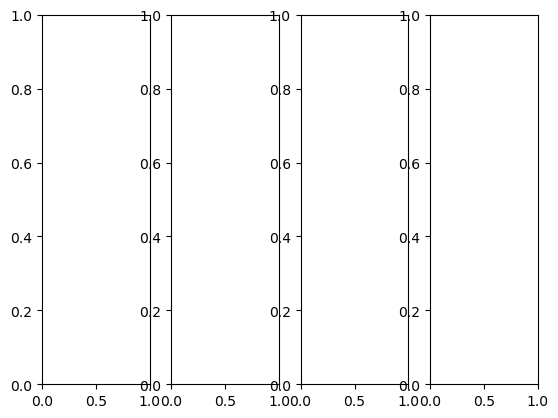

In [187]:
fig, axs = plt.subplots(1,4)

In [188]:
df.boxplot(column = 'target',ax = axs[0])
df.boxplot(column = 'O2_1',ax = axs[1])
df.boxplot(column = 'O2_2',ax = axs[2])
df.boxplot(column = 'BOD5_5',ax = axs[3])

<Axes: >

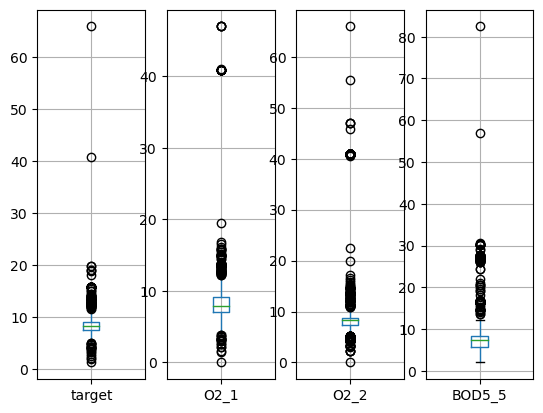

In [189]:
fig

In [200]:
for col in df[['target','O2_1','O2_2','BOD5_5']].columns:
    Q1 = df[col].quantile(0.1)
    Q2 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    Q4 = df[col].quantile(0.9)
    
    inter_quartile_range = abs(Q4-Q1)
    
    lower_limit = Q1 - (1.5 * inter_quartile_range)
    upper_limit = Q4 + (1.5 * inter_quartile_range)
    
    lower_limit_1 = Q2 - (1.5 * inter_quartile_range)
    upper_limit_1 = Q3 + (1.5 * inter_quartile_range)
    
    print(col)
    print(df[col].describe())
    print('lower_limit',lower_limit)
    print('upper_limit',upper_limit)
    print('lower_limit_1',lower_limit_1)
    print('upper_limit_1',upper_limit_1)
    
    df = df[(df[col]>lower_limit_1) & (df[col]<upper_limit_1)]
    print(df.shape)
    

target
count    3152.000000
mean        8.334746
std         1.206822
min         3.410000
25%         7.460000
50%         8.120000
75%         9.100000
max        13.490000
Name: target, dtype: float64
lower_limit 3.4150000000000005
upper_limit 13.295
lower_limit_1 3.7550000000000003
upper_limit_1 12.805
(3135, 37)
O2_1
count    3135.000000
mean        7.937806
std         1.507576
min         1.490000
25%         7.100000
50%         7.785000
75%         9.100000
max        14.900000
Name: O2_1, dtype: float64
lower_limit 0.5375000000000041
upper_limit 15.197499999999996
lower_limit_1 1.6025000000000027
upper_limit_1 14.597499999999997
(3133, 37)
O2_2
count    3133.000000
mean        7.814127
std         1.362812
min         2.200000
25%         7.250000
50%         8.300000
75%         8.600000
max        13.700000
Name: O2_2, dtype: float64
lower_limit 0.1999999999999993
upper_limit 14.120000000000001
lower_limit_1 2.0299999999999994
upper_limit_1 13.82
(3133, 37)
BOD5_5
count    

In [201]:
df.shape

(3133, 37)

In [202]:
df.to_csv("csv_submission_version2.csv", index = False)